# Data Exploration and Feature Engineering

In [248]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
## os.chdir("../Data/edited/")

In [249]:
aemo_wu_df = pd.read_csv('aemo_wu_merged.csv', index_col=[0], parse_dates=[0]) 

In [250]:
aemo_wu_df.head(3)

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair


In [251]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.0
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,0.911634,29.332540,0.0
std,403.227198,6.504368,4.280321,21.330864,5.149548,5.521146,0.471126,0.0
min,761.204000,1.100000,-15.000000,5.000000,0.000000,0.000000,29.000000,0.0
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,0.000000,29.000000,0.0
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,0.000000,29.000000,0.0
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,0.000000,30.000000,0.0
max,3979.836000,42.800000,22.800000,100.000000,37.000000,58.000000,30.000000,0.0


In [252]:
numerical = ['Operational Demand (MW)','temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)','wind_gush(mph)', 'pressure(in)', 'precip.(in)' ]
categorical = ['Wind', 'Condition']

<AxesSubplot:>

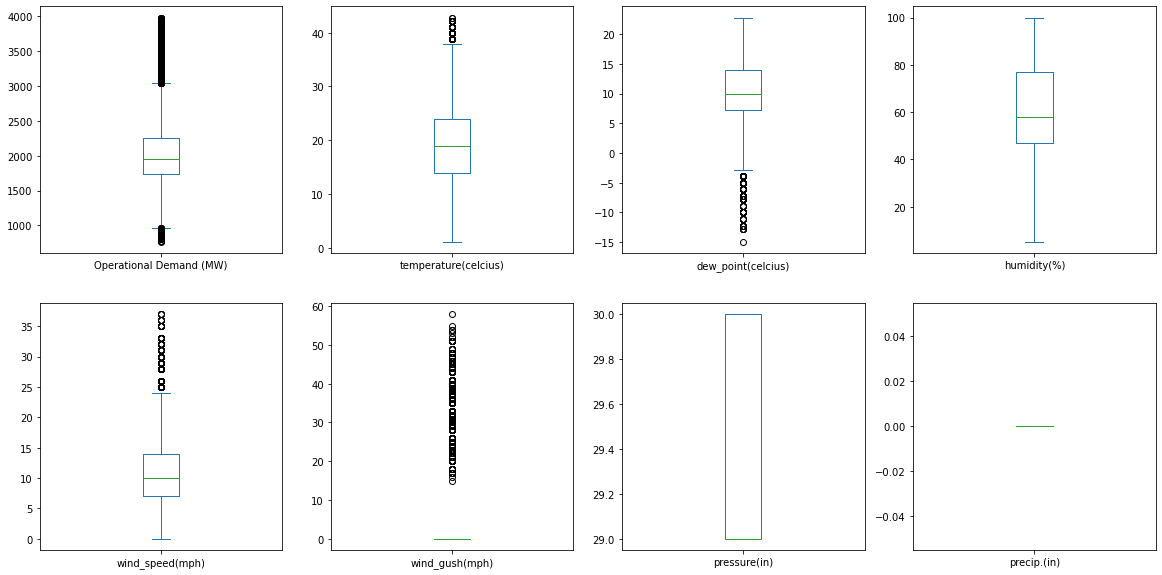

In [253]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20, 10))
aemo_wu_df['Operational Demand (MW)'].plot.box(ax=axes[0,0])
aemo_wu_df['temperature(celcius)'].plot.box(ax=axes[0,1])
aemo_wu_df['dew_point(celcius)'].plot.box(ax=axes[0,2])
aemo_wu_df['humidity(%)'].plot.box(ax=axes[0,3])
aemo_wu_df['wind_speed(mph)'].plot.box(ax=axes[1,0])
aemo_wu_df['wind_gush(mph)'].plot.box(ax=axes[1,1])
aemo_wu_df['pressure(in)'].plot.box(ax=axes[1,2])
aemo_wu_df['precip.(in)'].plot.box(ax=axes[1,3])

Wind gush is almost 0 and percipation is completely 0. So removing the columns.

In [254]:
aemo_wu_df = aemo_wu_df.drop(['wind_gush(mph)','precip.(in)'], axis = 1)
numerical.remove('wind_gush(mph)')
numerical.remove('precip.(in)')

In [255]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,29.332540
std,403.227198,6.504368,4.280321,21.330864,5.149548,0.471126
min,761.204000,1.100000,-15.000000,5.000000,0.000000,29.000000
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,29.000000
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,29.000000
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,30.000000
max,3979.836000,42.800000,22.800000,100.000000,37.000000,30.000000


<AxesSubplot:xlabel='pressure(in)', ylabel='Operational Demand (MW)'>

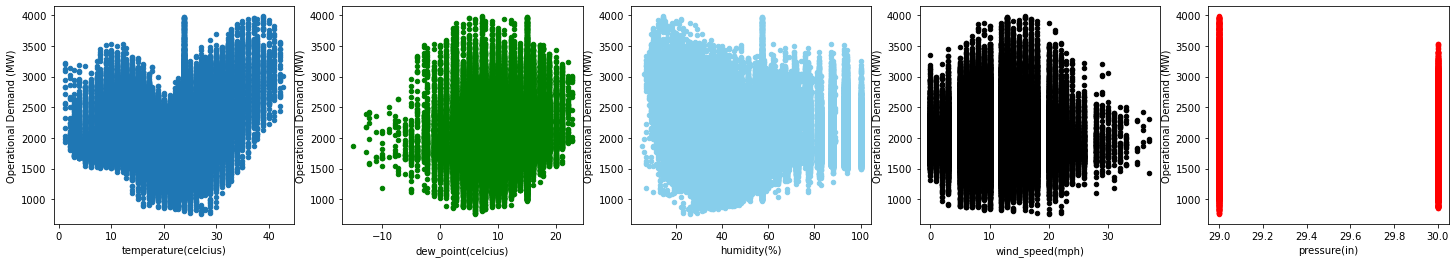

In [256]:
#pd.plotting.scatter_matrix(aemo_wu_df[['Operational Demand (MW)', 'temperature(celcius)']], figsize=(20, 10))

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(25, 4))
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'temperature(celcius)', ax=axes[0,])
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'dew_point(celcius)', ax=axes[1,], color = "green")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'humidity(%)', ax=axes[2,], color = "skyblue")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'wind_speed(mph)', ax=axes[3,], color = "black")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'pressure(in)', ax=axes[4,], color = "red")


In [257]:
aemo_wu_df.corr()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
Operational Demand (MW),1.000000,0.196843,0.121277,-0.067923,0.044680,-0.095511
temperature(celcius),0.196843,1.000000,0.307910,-0.771656,0.397263,-0.468408
dew_point(celcius),0.121277,0.307910,1.000000,0.304610,0.035015,-0.446545
humidity(%),-0.067923,-0.771656,0.304610,1.000000,-0.439327,0.163130
wind_speed(mph),0.044680,0.397263,0.035015,-0.439327,1.000000,-0.293212
pressure(in),-0.095511,-0.468408,-0.446545,0.163130,-0.293212,1.000000


In [258]:
print("The correlation between Operational demand versus other 5 variables\n")

print("Operational Demand vs temperature\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['temperature(celcius)']))
print("Operational Demand vs dew_point\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['dew_point(celcius)']))
print("Operational Demand vs humidity\t\t: ",  aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['humidity(%)']))
print("Operational Demand vs wind_speed\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['wind_speed(mph)']))
print("Operational Demand vs pressure\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['pressure(in)']))

The correlation between Operational demand versus other 5 variables

Operational Demand vs temperature	:  0.1968427219578067
Operational Demand vs dew_point		:  0.12127721951352602
Operational Demand vs humidity		:  -0.06792254140950536
Operational Demand vs wind_speed	:  0.04467995981361229
Operational Demand vs pressure		:  -0.09551106630966173


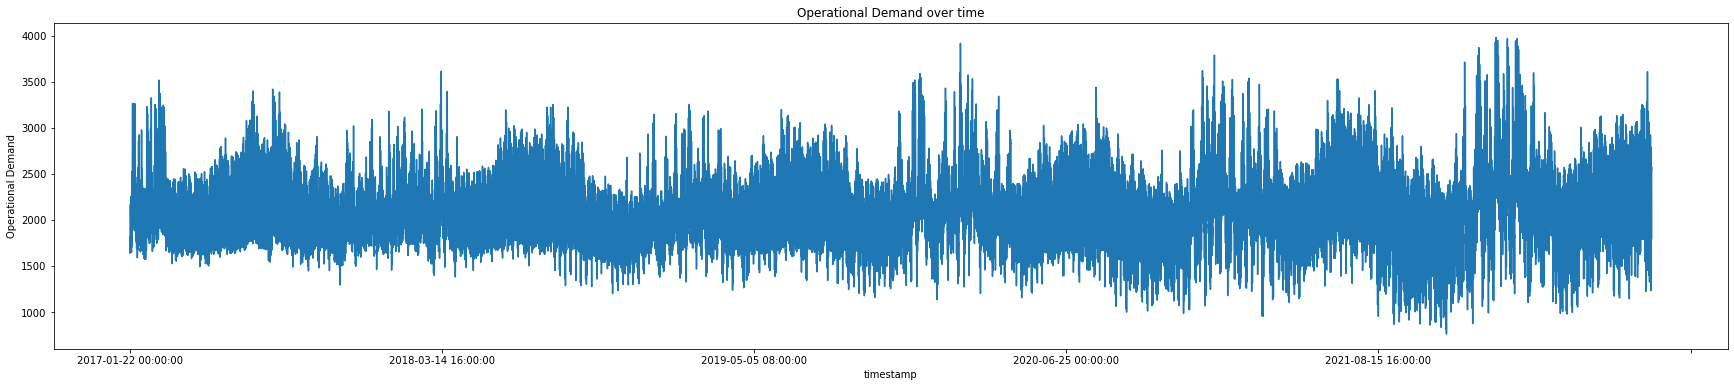

In [259]:
aemo_wu_df.plot(x = "timestamp", y = 'Operational Demand (MW)', figsize=(30, 6), legend = False)
plt.title("Operational Demand over time")
plt.ylabel("Operational Demand")
plt.show()

<AxesSubplot:xlabel='timestamp'>

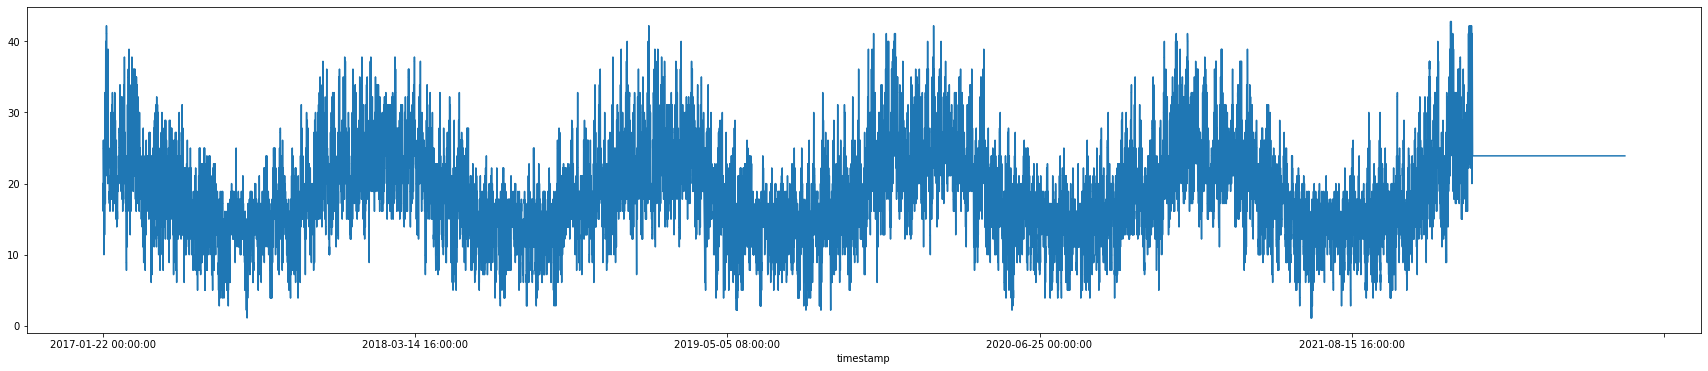

In [260]:
aemo_wu_df.plot(x = "timestamp", y = 'temperature(celcius)', figsize=(30, 6), legend = False)

<AxesSubplot:xlabel='timestamp'>

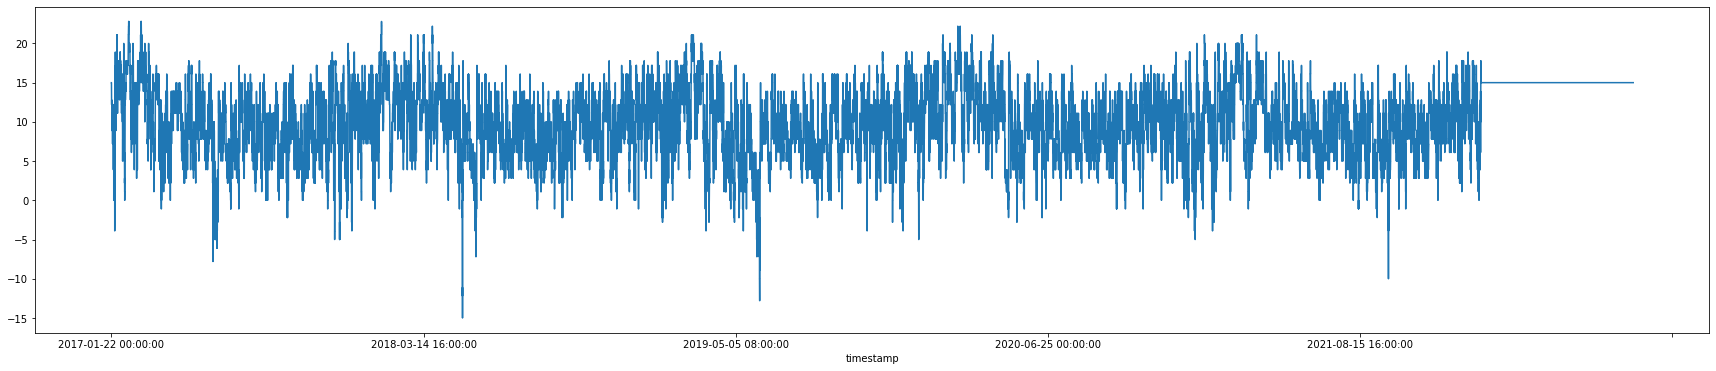

In [261]:
aemo_wu_df.plot(x = "timestamp", y = 'dew_point(celcius)', figsize=(30, 6), legend = False)

In [262]:
aemo_wu_df['year'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).year

In [263]:
aemo_wu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97504 entries, 0 to 97503
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                97504 non-null  object 
 1   Operational Demand (MW)  97504 non-null  float64
 2   temperature(celcius)     97504 non-null  float64
 3   dew_point(celcius)       97504 non-null  float64
 4   humidity(%)              97504 non-null  float64
 5   Wind                     97504 non-null  object 
 6   wind_speed(mph)          97504 non-null  float64
 7   pressure(in)             97504 non-null  float64
 8   Condition                97504 non-null  object 
 9   year                     97504 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 8.2+ MB


In [264]:
type(aemo_wu_df)

pandas.core.frame.DataFrame

In [265]:
def create_features(df, label=None):
    """
    Creates time series features datetime column 
    """
    df['date'] = df['timestamp']
    df['hour'] = pd.DatetimeIndex(df['date']).hour
    df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
    df['quarter'] = pd.DatetimeIndex(df['date']).quarter
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear
    df['dayofmonth'] = pd.DatetimeIndex(df['date']).day
    df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [266]:
aemo_wu_df.head()

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),pressure(in),Condition,year
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,29.0,Fair,2017
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,29.0,Fair,2017
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,29.0,Fair,2017
3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,29.0,Fair,2017
4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,29.0,Fair,2017


In [267]:
dropped_columns = ['Operational Demand (MW)', 'timestamp', 'date', 'Condition', 'Wind']

In [268]:
test_year = random.randint(2017,2022)

training_data = aemo_wu_df.loc[aemo_wu_df['year'] != 2022].copy()
testing_data = aemo_wu_df.loc[aemo_wu_df['year'] == 2022].copy()

X_train, y_train = create_features(training_data, label='Operational Demand (MW)')
X_test, y_test = create_features(testing_data, label='Operational Demand (MW)')

X_train = training_data.drop(dropped_columns , axis = 1)
y_train = training_data['Operational Demand (MW)']

X_test = testing_data.drop(dropped_columns, axis = 1)
y_test = testing_data['Operational Demand (MW)']


/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/579277530.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/579277530.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear


In [269]:
X_train.head()

,temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),year,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear
0,20.0,15.0,73.0,9.0,29.0,2017,0,6,1,1,22,22,3
1,20.0,15.0,73.0,10.0,29.0,2017,0,6,1,1,22,22,3
2,18.9,15.0,78.0,9.0,29.0,2017,1,6,1,1,22,22,3
3,18.9,15.0,78.0,15.0,29.0,2017,1,6,1,1,22,22,3
4,18.9,12.8,68.0,18.0,29.0,2017,2,6,1,1,22,22,3


In [270]:
reg = XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

/Users/naufaln/opt/miniconda3/envs/cits5508-2022/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:1441.33325	validation_1-rmse:1582.56042
[1]	validation_0-rmse:1018.81543	validation_1-rmse:1168.73425
[2]	validation_0-rmse:724.94067	validation_1-rmse:880.05560
[3]	validation_0-rmse:521.50787	validation_1-rmse:686.29321
[4]	validation_0-rmse:382.47809	validation_1-rmse:561.75171
[5]	validation_0-rmse:289.14807	validation_1-rmse:473.24066
[6]	validation_0-rmse:226.73006	validation_1-rmse:416.03415
[7]	validation_0-rmse:188.20750	validation_1-rmse:384.25461
[8]	validation_0-rmse:164.13390	validation_1-rmse:363.41156
[9]	validation_0-rmse:149.86461	validation_1-rmse:354.12662
[10]	validation_0-rmse:140.16461	validation_1-rmse:343.09152
[11]	validation_0-rmse:134.06723	validation_1-rmse:336.29779
[12]	validation_0-rmse:129.70456	validation_1-rmse:333.08472
[13]	validation_0-rmse:126.66254	validation_1-rmse:331.10370
[14]	validation_0-rmse:124.78593	validation_1-rmse:328.90280
[15]	validation_0-rmse:123.27110	validation_1-rmse:328.31531
[16]	validation_0-rmse:120.403

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

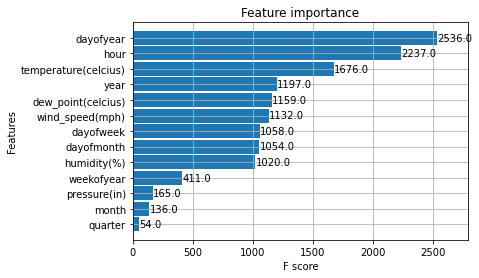

In [271]:
_ = plot_importance(reg, height=0.9) 

In [272]:
testing_data['MW_Prediction'] = reg.predict(X_test)
pjme_all = pd.concat([testing_data, training_data], sort=False)

testing_data.index = pd.DatetimeIndex(testing_data['timestamp'])
# 
testing_data.head(3)

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),pressure(in),Condition,year,date,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,MW_Prediction
timestamp,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,2139.158,22.8,13.9,57.0,SE,10.0,29.0,Fair,2022,2022-01-01 00:00:00,0,5,1,1,1,1,52,2167.496826
2022-01-01 00:30:00,2022-01-01 00:30:00,2112.486,22.2,13.9,60.0,ESE,10.0,29.0,Fair,2022,2022-01-01 00:30:00,0,5,1,1,1,1,52,2107.769043
2022-01-01 01:00:00,2022-01-01 01:00:00,2051.064,22.2,12.8,57.0,SE,12.0,29.0,Fair,2022,2022-01-01 01:00:00,1,5,1,1,1,1,52,2061.822998


In [273]:
columns = ['Operational Demand (MW)','MW_Prediction']

In [274]:
df = testing_data.loc[testing_data['month'] <= 4].copy()

df = df[columns]

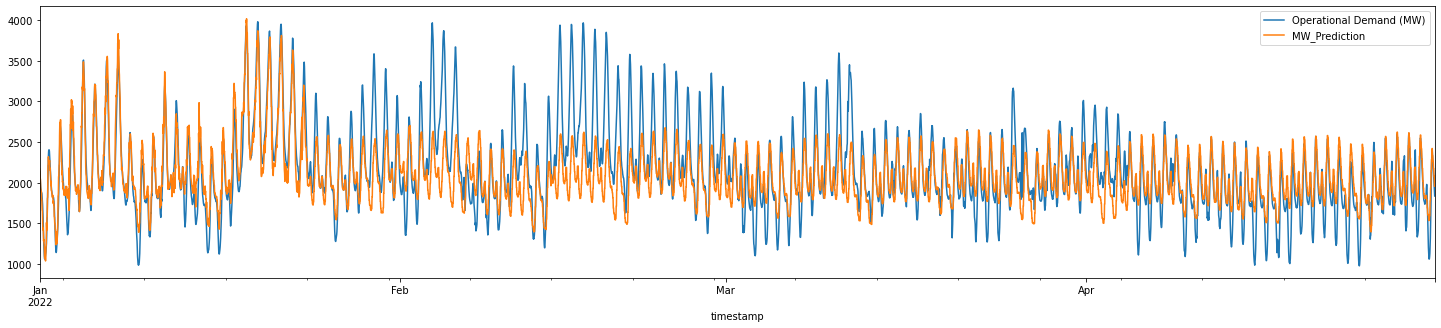

In [275]:
_ = df.plot(figsize=(25, 5))

In [276]:
mse = mean_squared_error(y_test, testing_data['MW_Prediction'])
rmse_svm = np.sqrt(mse)
rmse_svm

306.7694840180518

In [277]:
testing_data[columns].head(50)

,Operational Demand (MW),MW_Prediction
timestamp,,
2022-01-01 00:00:00,2139.158,2167.496826
2022-01-01 00:30:00,2112.486,2107.769043
2022-01-01 01:00:00,2051.064,2061.822998
2022-01-01 01:30:00,2001.144,2039.972534
2022-01-01 02:00:00,1956.240,1928.212402
2022-01-01 02:30:00,1925.352,1917.496338
2022-01-01 03:00:00,1910.048,1894.679932
2022-01-01 03:30:00,1878.614,1889.091675
2022-01-01 04:00:00,1877.364,1784.789307
